In [1]:
# Example 1: Linear Regression
# 1.1 Importing tensorflow and other libraries.
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

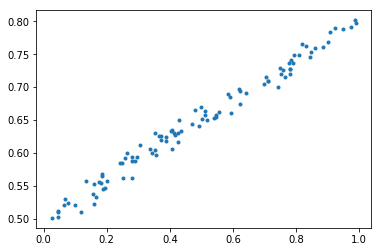

In [2]:
# 1.2 Creating input data using NumPy. y = x * 0.3 + 0.5 + noise
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
y_data = 0.3 * x_data + 0.5 + noise

pylab.plot(x_data, y_data, '.')

In [6]:
# 1.3 Building inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

print(W)
print(b)
print(y)

<tf.Variable 'Variable_6:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'Variable_7:0' shape=(1,) dtype=float32_ref>
Tensor("add_3:0", shape=(100,), dtype=float32)


In [10]:
# 1.4 Building training graph.
loss = tf.reduce_mean(tf.square(y - y_data))  # Create an operation that calculates loss.
learning_rate=0.5
optimizer = tf.train.GradientDescentOptimizer(learning_rate)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.initialize_all_variables()  # Create an operation initializes all the variables.

# Uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are.
# print("loss:", loss)
# print("optimizer:", optimizer)
# print("train:", train)
# print(init)

## Graph we create
# print(tf.get_default_graph().as_graph_def())

('optimizer:', <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x1823ce6790>)


In [12]:
# 1.6 Creating a session and launch the graph.
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)  # Save initial values for plotting later.

# Uncomment the following line to see the initial W and b values.
# print(sess.run([W, b]))

In [13]:
# 1.7 Performing training; data flowing through the graph
for step in range(201):
    sess.run(train)
    # Uncomment the following two lines to watch training happen real time.
    if step % 20 == 0:
      print(step, sess.run([W, b]))

print(sess.run([W, b]))

(0, [array([0.8439706], dtype=float32), array([0.2921111], dtype=float32)])
(20, [array([0.458679], dtype=float32), array([0.42019042], dtype=float32)])
(40, [array([0.3493988], dtype=float32), array([0.4759867], dtype=float32)])
(60, [array([0.31599334], dtype=float32), array([0.49304283], dtype=float32)])
(80, [array([0.30578175], dtype=float32), array([0.49825668], dtype=float32)])
(100, [array([0.3026602], dtype=float32), array([0.49985048], dtype=float32)])
(120, [array([0.30170602], dtype=float32), array([0.50033766], dtype=float32)])
(140, [array([0.30141437], dtype=float32), array([0.50048655], dtype=float32)])
(160, [array([0.30132514], dtype=float32), array([0.50053215], dtype=float32)])
(180, [array([0.30129787], dtype=float32), array([0.50054604], dtype=float32)])
(200, [array([0.30128953], dtype=float32), array([0.5005503], dtype=float32)])
[array([0.30128953], dtype=float32), array([0.5005503], dtype=float32)]


(0, 1.5)

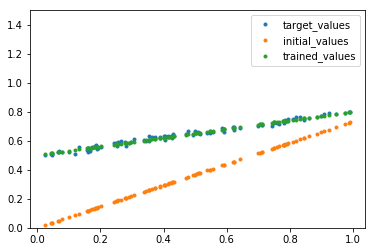

In [14]:
# 1.8 Comparing the initial regression line with the trained values.
pylab.plot(x_data, y_data, '.', label="target_values")
pylab.plot(x_data, y_initial_values, ".", label="initial_values")
pylab.plot(x_data, sess.run(y), ".", label="trained_values")
pylab.legend()
pylab.ylim(0, 1.5)